In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd

data = {
    'teacher_id': list(range(1, 21)),
    'gender': ['F', 'M', 'F', 'M', 'M', 'F', 'M', 'F', 'M', 'F',
               'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    'beauty': [7.1, 6.3, 8.0, 5.9, 6.5, 7.2, 6.1, 7.8, 5.7, 8.4,
               6.0, 7.3, 6.8, 7.5, 5.6, 7.9, 6.4, 8.1, 5.8, 7.0],
    'rating': [4.7, 4.2, 4.9, 3.9, 4.4, 4.6, 4.0, 4.8, 3.7, 4.9,
               4.1, 4.5, 4.3, 4.6, 3.8, 4.7, 4.2, 4.9, 3.9, 4.4],
    'tenure': ['No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes',
               'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No'],
    'students': [55, 65, 40, 75, 60, 50, 80, 45, 70, 85,
                 90, 35, 75, 60, 50, 95, 40, 85, 55, 65]
}

df = pd.DataFrame(data)
df


,teacher_id,gender,beauty,rating,tenure,students
0,1,F,7.1,4.7,No,55
1,2,M,6.3,4.2,Yes,65
2,3,F,8.0,4.9,No,40
3,4,M,5.9,3.9,Yes,75
4,5,M,6.5,4.4,No,60
5,6,F,7.2,4.6,Yes,50
6,7,M,6.1,4.0,No,80
7,8,F,7.8,4.8,Yes,45
8,9,M,5.7,3.7,No,70
9,10,F,8.4,4.9,Yes,85


Q1. Can you identify whether teachers Rating Data is a time serires or cross sectional?

In [3]:
# Q1. Identify whether teachers Rating Data is time series or cross sectional
print("The Teachers Rating Data is Cross-Sectional — because it captures \
data for different teachers at a single point in time, not over multiple time periods.")

The Teachers Rating Data is Cross-Sectional — because it captures data for different teachers at a single point in time, not over multiple time periods.


Q2. Find the mean, median, minimum and maximum values for the students.

In [4]:
# Q2. Find mean, median, min, max for students
print("Mean students:", df['students'].mean())
print("Median students:", df['students'].median())
print("Min students:", df['students'].min())
print("Max students:", df['students'].max(), "\n")

Mean students: 63.75
Median students: 62.5
Min students: 35
Max students: 95 



Q3. Produce the descriptive statistics table.

In [6]:
# Q3. Produce descriptive statistics table
print("Descriptive Statistics Table:\n", df.describe())
     

Descriptive Statistics Table:
        teacher_id    beauty     rating   students
count    20.00000  20.00000  20.000000  20.000000
mean     10.50000   6.87000   4.375000  63.750000
std       5.91608   0.88621   0.387808  17.761208
min       1.00000   5.60000   3.700000  35.000000
25%       5.75000   6.07500   4.075000  50.000000
50%      10.50000   6.90000   4.400000  62.500000
75%      15.25000   7.57500   4.700000  76.250000
max      20.00000   8.40000   4.900000  95.000000


Q4. Create a histogram of the beauty variable and breifly comment on the distribution of the data.

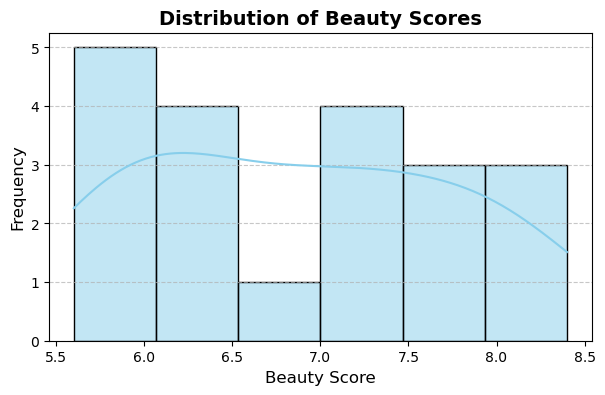

The histogram shows two main clusters: one around beauty scores 5.5–6.0 
and another near 7.8–8.2. This indicates a bimodal distribution. 
Slight left-skew is visible, as slightly more teachers fall in the lower beauty range.


In [7]:
# Q4. Create histogram of beauty variable
plt.figure(figsize=(7, 4))
sns.histplot(df['beauty'], color='skyblue', edgecolor='black', kde=True)
plt.title('Distribution of Beauty Scores', fontsize=14, fontweight='bold')
plt.xlabel('Beauty Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("The histogram shows two main clusters: one around beauty scores 5.5–6.0 \n"
      "and another near 7.8–8.2. This indicates a bimodal distribution. \n"
      "Slight left-skew is visible, as slightly more teachers fall in the lower beauty range.")

Q5. Does average beauty score differ by gender? Produce the means and standard deviations for both male and female instructors.

In [8]:
# Q5. Does average beauty score differ by gender?
beauty_by_gender = df.groupby('gender')['beauty'].agg(['mean', 'std'])
print(f"Q5. Average Beauty Score by Gender:\n {beauty_by_gender} \n")

print("Female instructors have a higher average beauty score than male instructors.")

Q5. Average Beauty Score by Gender:
         mean       std
gender                
F       7.63  0.476212
M       6.11  0.384274 

Female instructors have a higher average beauty score than male instructors.


Q6. Calculate the percentage of males and females that are tenured professors. Will you say that tenure status differ by gender?

In [9]:
# Q6. Calculate percentage of males and females that are tenured
tenure_percent = df.groupby(['gender', 'tenure']).size().unstack(fill_value=0)
print(f"{tenure_percent} \n")

tenure_percent['Percentage_Tenured'] = (tenure_percent['Yes'] / tenure_percent.sum(axis=1)) * 100
print(f"Tenure Percentage by Gender:\n {tenure_percent[['Percentage_Tenured']]} \n")

print("Based on percentages, tenure status slightly differs by gender \n \
        Males appear to have a higher tenure rate in this small dataset")

tenure  No  Yes
gender         
F        7    3
M        3    7 

Tenure Percentage by Gender:
 tenure  Percentage_Tenured
gender                    
F                     30.0
M                     70.0 

Based on percentages, tenure status slightly differs by gender 
         Males appear to have a higher tenure rate in this small dataset
